## Setup

In [1]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v3_diogo import *


%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

np.random.seed(1)

train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

def plot_costs(costs, learning_rate=0.0075):
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

print('\nSetup complete!')


Setup complete!


## Baseline

use final 4-Layers model from week-04 assignment-02 as a baseline

```
Processing time:  90718.75
Train Accuracy: 0.9808612440191385
Test Accuracy: 0.8200000000000001
```

Cost after iteration 0: 0.7717493284237686
Cost after iteration 100: 0.6720534400822914
Cost after iteration 200: 0.6482632048575212
Cost after iteration 300: 0.6115068816101354
Cost after iteration 400: 0.5670473268366111
Cost after iteration 500: 0.5401376634547801
Cost after iteration 600: 0.5279299569455267
Cost after iteration 700: 0.46547737717668514
Cost after iteration 800: 0.36912585249592794
Cost after iteration 900: 0.39174697434805344
Cost after iteration 1000: 0.3151869888600617
Cost after iteration 1100: 0.2726998441789385
Cost after iteration 1200: 0.23741853400268137
Cost after iteration 1300: 0.19960120532208647
Cost after iteration 1400: 0.18926300388463305
Cost after iteration 1499: 0.1609978212526493
Processing time:  90718.75
Accuracy: 0.9808612440191385
Accuracy: 0.8200000000000001


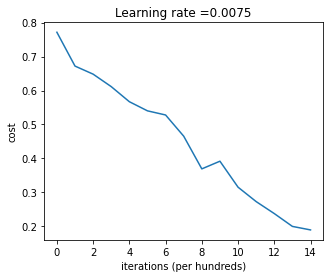

In [3]:
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization.
    parameters = initialize_parameters_deep(layers_dims)

    # Loop (gradient descent)
    for i in range(0, num_iterations):
        AL, caches = L_model_forward(X, parameters)
        cost = compute_cost(AL, Y)
        grads = L_model_backward(AL, Y, caches)
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
    
    return parameters, costs

learning_rate = 0.0075

tic = time.process_time()
parameters, costs = L_layer_model(train_x, train_y, layers_dims, num_iterations = 1500, print_cost = True)
toc = time.process_time()
processing_time = 1000 * (toc - tic)
print('Processing time: ', str(processing_time) )

pred_train = predict(train_x, train_y, parameters)
pred_test = predict(test_x, test_y, parameters)



plot_costs(costs, learning_rate)


#### Experiment 1 - Changing relu function to test if theres is any peformance impact

I tried changing relu forward propagation function for one of those in [How to implement the ReLU function in Numpy](https://stackoverflow.com/questions/32109319/how-to-implement-the-relu-function-in-numpy)

The best suggestions make use of change inplace. 
In current architecture, inplace changing do not make sense because the original Z need to be passed to relu_backward function.

Tried changing the relu from np.maximum to a multiply function but I cannot see any improvement.
Probably because this function is not the dominant in execution time.

The test was done changing linear_activation_forward function directly to call relu optimized functions.




Cost after iteration 0: 0.7717493284237686
Cost after iteration 100: 0.6720534400822914
Cost after iteration 200: 0.6482632048575212
Cost after iteration 300: 0.6115068816101354
Cost after iteration 400: 0.5670473268366111
Cost after iteration 500: 0.5401376634547801
Cost after iteration 600: 0.5279299569455267
Cost after iteration 700: 0.46547737717668514
Cost after iteration 800: 0.36912585249592794
Cost after iteration 900: 0.39174697434805344
Cost after iteration 1000: 0.3151869888600617
Cost after iteration 1100: 0.2726998441789385
Cost after iteration 1200: 0.23741853400268137
Cost after iteration 1300: 0.19960120532208647
Cost after iteration 1400: 0.18926300388463305
Cost after iteration 1499: 0.1609978212526493
Processing time:  92093.75
Accuracy: 0.9808612440191385
Accuracy: 0.8200000000000001


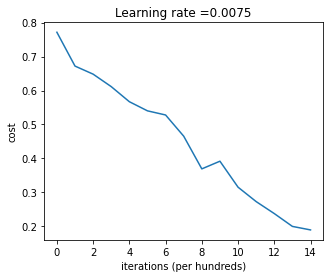

In [2]:
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization.
    parameters = initialize_parameters_deep(layers_dims)

    # Loop (gradient descent)
    for i in range(0, num_iterations):
        AL, caches = L_model_forward(X, parameters)
        cost = compute_cost(AL, Y)
        grads = L_model_backward(AL, Y, caches)
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
    
    return parameters, costs

learning_rate = 0.0075

tic = time.process_time()
parameters, costs = L_layer_model(train_x, train_y, layers_dims, num_iterations = 1500, print_cost = True)
toc = time.process_time()
processing_time = 1000 * (toc - tic)
print('Processing time: ', str(processing_time) )

pred_train = predict(train_x, train_y, parameters)
pred_test = predict(test_x, test_y, parameters)



plot_costs(costs, learning_rate)

### Experiment 2 - Using leaky relu instead instead to relu

hypothesis: the gradient descent will converge slightly faster


The test was done changing linear_activation_forward and linear_activation_backward functions directly to call leaky relu forward and backward functions.


results: I am not sure what has happned. The execution did not converge. 

Tried also reducing the learning rate, but still not converging. May be I have implemented something wrong, I am not sure whats is the problem.

Things are not easy as seen

Cost after iteration 0: 0.7717493284237686
Cost after iteration 100: 0.6692696631401115
Cost after iteration 200: 0.6388738671173996
Cost after iteration 300: 0.5978842419394992
Cost after iteration 400: 0.5688271812027766
Cost after iteration 500: 0.4612600061610806
Cost after iteration 600: 0.5084836067888391
Cost after iteration 700: 0.32759554824353243
Cost after iteration 800: 0.3103980005754491
Cost after iteration 900: 0.2488305281626642
Cost after iteration 1000: 0.20730930330849956
Cost after iteration 1100: 0.14048537378492806
Cost after iteration 1200: 0.11567032435733039
Cost after iteration 1300: 0.09925963099373132
Cost after iteration 1400: 0.08584462857591119
Cost after iteration 1500: 0.07497507157629975
Cost after iteration 1600: 0.067808819508068
Cost after iteration 1700: 0.05840152716698281
Cost after iteration 1800: 0.05205409767343473
Cost after iteration 1900: 0.04767964899529183
Cost after iteration 2000: 0.042258944535071216
Cost after iteration 2100: 0.037797

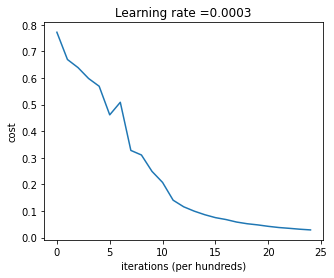

In [38]:
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization.
    parameters = initialize_parameters_deep(layers_dims)

    # Loop (gradient descent)
    for i in range(0, num_iterations):
        AL, caches = L_model_forward(X, parameters)
        cost = compute_cost(AL, Y)
        grads = L_model_backward(AL, Y, caches)
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
    
    return parameters, costs

learning_rate = 0.0003

tic = time.process_time()
parameters, costs = L_layer_model(train_x, train_y, layers_dims, num_iterations = 12500, print_cost = True, learning_rate = 0.01)
toc = time.process_time()
processing_time = 1000 * (toc - tic)
print('Processing time: ', str(processing_time) )

pred_train = predict(train_x, train_y, parameters)
pred_test = predict(test_x, test_y, parameters)



plot_costs(costs, learning_rate)


### Experiment 3 - Adding regularizaiton in cost and gradient descent

Term to add in cost function 

$ \frac { \lambda \sum_{j=1}^n W_j^2 } {m} $


Term to add in gradient descent 

$ \frac { \lambda \sum_{j=1}^n W_j } {m} $



We do not regularize bias term.




Cost after iteration 0: 0.6956392079247663
Cost after iteration 100: 0.584445192535293
Cost after iteration 200: 0.5357578728820465
Cost after iteration 300: 0.4713333327232986
Cost after iteration 400: 0.40832612933403295
Cost after iteration 499: 0.3315645098205845
Processing time:  169578.125
Accuracy: 0.8133971291866028
Accuracy: 0.5


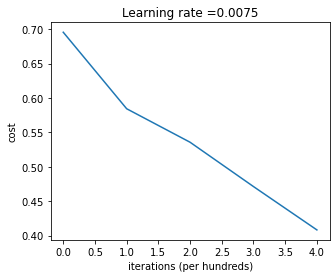

In [42]:
layers_dims = [12288, 256, 20, 7, 5, 1] #  4-layer model

def compute_cost_with_regularization(AL, Y, regularization, parameters):
    m = Y.shape[1]

    firstTerm = np.squeeze (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))
    regularizationTerm = 0

    L = len(parameters) // 2
    for l in range(L):
        regularizationTerm = np.squeeze(np.sum(np.dot(parameters["W" + str(l+1)], parameters["W" + str(l+1)].T)))


    # print(regularizationTerm)
    
    cost = (1./m) * (firstTerm + regularizationTerm)
    
    # cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

def update_parameters_with_regularization(parameters, grads, learning_rate, regularization):
    L = len(parameters) // 2 # number of layers in the neural network

    for l in range(L):
        regularizationTerm = regularization * parameters["W" + str(l+1)]
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate *( grads["dW" + str(l+1)] + regularizationTerm )
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
        
    return parameters

def L_layer_model_with_regularization(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False, regularization=0.01):
    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization.
    parameters = initialize_parameters_deep(layers_dims)

    # Loop (gradient descent)
    for i in range(0, num_iterations):
        AL, caches = L_model_forward(X, parameters)
        cost = compute_cost_with_regularization(AL, Y, regularization, parameters)
        grads = L_model_backward(AL, Y, caches)
        parameters = update_parameters_with_regularization(parameters, grads, learning_rate, regularization)
                
        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
    
    return parameters, costs


learning_rate = 0.0075

tic = time.process_time()
parameters, costs = L_layer_model_with_regularization(train_x, train_y, layers_dims, learning_rate = 0.01, num_iterations = 500, print_cost = True, regularization=0.005)
toc = time.process_time()
processing_time = 1000 * (toc - tic)
print('Processing time: ', str(processing_time) )

pred_train = predict(train_x, train_y, parameters)
pred_test = predict(test_x, test_y, parameters)



plot_costs(costs, learning_rate)
